In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Bandit():
  def __init__(self, num_of_arms):
    self.n = num_of_arms
    self.q_star = np.random.normal(size=num_of_arms)

  def get_reward(self, action):
    return self.q_star[action] + np.random.normal()
    
  def get_optimal_action(self):
    return np.argmax(self.q_star)

In [3]:
class Agent():
  def __init__(self, epsilon, q_init, num_of_arms, step_size):
    self.epsilon = epsilon
    self.q = q_init
    self.num_of_arms = num_of_arms
    self.const_step_size = step_size

    self.actions_count = np.zeros(self.num_of_arms)

  def get_action(self):
    return np.random.choice([np.argmax(self.q), np.random.choice(self.num_of_arms)],
                            p=[1-self.epsilon, self.epsilon])


  def mean_average_update(self, action, reward):
    self.actions_count[action] += 1
    current_action_step = 1.0 / self.actions_count[action]
    self.q[action] = self.q[action] + current_action_step * (reward - self.q[action])

  def const_step_update(self, action, reward):
    self.q[action] = self.q[action] + self.const_step_size * (reward - self.q[action])


In [4]:
game_params_mean = {
    'type': 'mean',
    'number_of_arms': 10,
    'epsilon': 0.1,
    'q_init': np.zeros(10),
    'step_size': 0,
    'steps_count': 10000
}

game_params_const = {
    'type': 'const',
    'number_of_arms': 10,
    'epsilon': 0.1,
    'q_init': np.zeros(10),
    'step_size': 0.2,
    'steps_count': 10000
}

In [5]:
class Game():
  def __init__(self, game_params: dict):
    self.game_params = game_params
    self.agent = Agent(game_params['epsilon'], 
                       game_params['q_init'],
                       game_params['number_of_arms'], 
                       game_params['step_size'])
    
    self.bandit = Bandit(game_params['number_of_arms'])
  
  def run(self):
    # store statistics
    average_rewards = np.zeros(self.game_params['steps_count'])
    percentage_optimals = np.zeros(self.game_params['steps_count'])
    sum_rewards = 0
    correct_rewards = 0
    for idx in range(self.game_params['steps_count']):
      # game step
      action = self.agent.get_action()
      reward = self.bandit.get_reward(action)
      # calc average
      sum_rewards += reward
      average_rewards[idx] = sum_rewards / (idx + 1)
      # calc correct
      correct_rewards += (action == self.bandit.get_optimal_action())
      percentage_optimals[idx] = correct_rewards / (idx + 1)
      # update reward
      if (self.game_params['type'] == 'mean'):
        self.agent.mean_average_update(action, reward)
      elif (self.game_params['type'] == 'const'):
        self.agent.const_step_update(action, reward)
    
    return average_rewards, percentage_optimals

In [6]:
game_mean = Game(game_params_mean)
game_const = Game(game_params_const)

In [7]:
mean_rew, oprimal = game_mean.run()

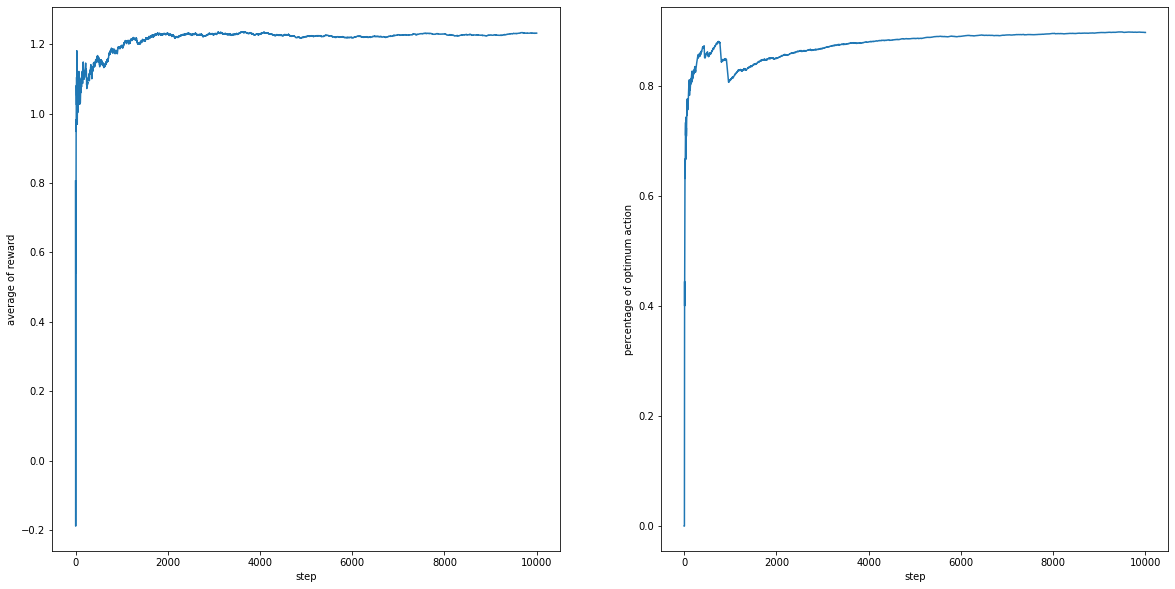

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
ax1.plot(range(len(mean_rew)),mean_rew)
ax1.set_ylabel('average of reward')
ax1.set_xlabel('step')

ax2.plot(range(len(oprimal)),oprimal)
ax2.set_ylabel('percentage of optimum action')
ax2.set_xlabel('step')
plt.show()

In [9]:
mean_rew_c, oprimal_c = game_const.run()

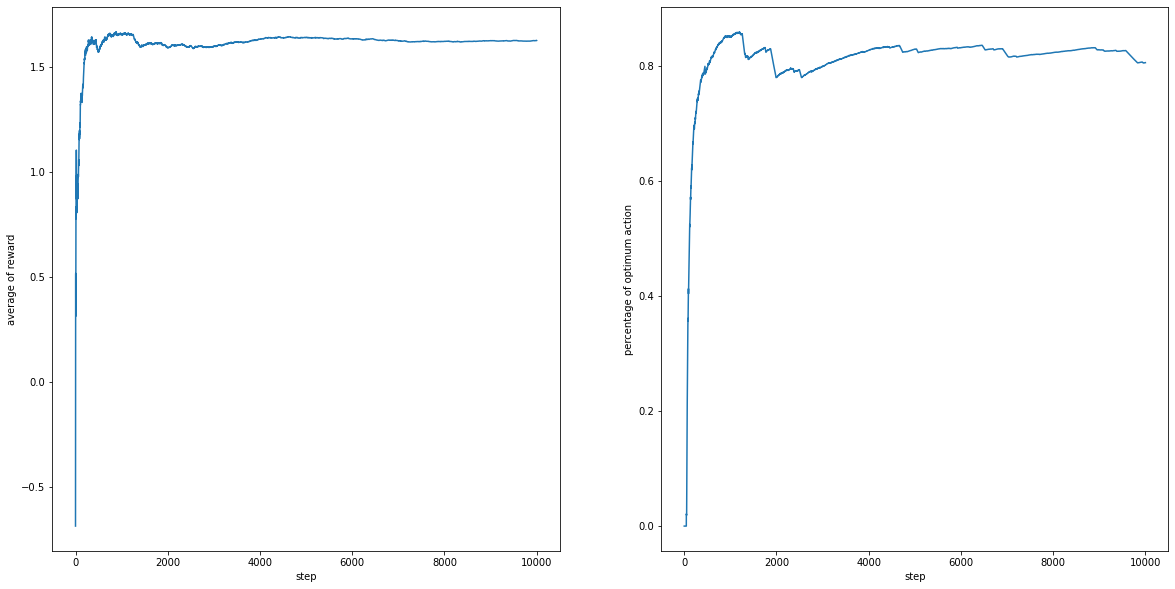

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
ax1.plot(range(len(mean_rew_c)),mean_rew_c)
ax1.set_ylabel('average of reward')
ax1.set_xlabel('step')

ax2.plot(range(len(oprimal_c)),oprimal_c)
ax2.set_ylabel('percentage of optimum action')
ax2.set_xlabel('step')
plt.show()
